In [2]:
!pip install nltk pandas matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 4.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 5.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 3.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 4.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 783.8/783.8 kB 4.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.2/14.2 MB 3.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.5/502.5 kB 4.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 4.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

### Imports:

In [7]:
import nltk
from nltk.collocations import *
from nltk.corpus import PlaintextCorpusReader
import pandas as pd
from math import pow
import csv
import glob
import hashlib
import matplotlib.pyplot as plt
import os
import sys

In [ ]:
lab1path = "../../lab1/src/"

sys.path.append(os.path.abspath(lab1path))

from lab1 import exe 

exe('../../lab1/assets/train.csv', 10000)



### Read dataset:

In [4]:

# df = pd.read_csv('../assets/test.csv', header=None)
df = pd.read_csv('../assets/train.csv', header=None)

(262, 258, 205, 205, 204, 201, 183, 183, 183, 183, 183, 183, 183, 183, 183, 174, 140, 135, 125, 123, 119, 102, 98, 95, 92, 91, 91, 90, 87, 86)
['the united states', 'new york reuters', 'lt a href', 'lt a gt', 'a href http', 'href http www', 'http www investor', 'www investor reuters', 'investor reuters com', 'reuters com fullquote', 'com fullquote aspx', 'fullquote aspx ticker', 'target stocks quickinfo', 'stocks quickinfo fullquote', 'quickinfo fullquote gt', 'the u s', 'reuters u s', 'one of the', 'n lt a', 'initial public offering', 'n target stocks', 'said on tuesday', 'quote profile research', 'inc lt a', 'said on wednesday', 'for the first', 'the athens olympics', 'lt b gt', 'according to a', 'the world s']


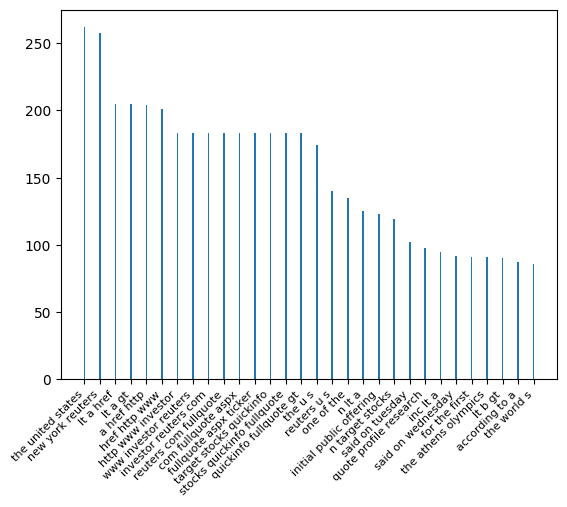

In [29]:

def lines(df):
    return df[2].count()


def str_by_id(id, df):
    if id < df[2].count():
        return (df[0].values[id], df[2].values[id] + ' ')
    else:
        raise Exception("id > items in file")


def t_score(trigram, freqs_dict, dictionary):
    n = 3
    count = freqs_dict[trigram]
    multiplication = 1
    for word in trigram:
        lemma_id = dictionary.token2id[word]
        multiplication *= dictionary.cfs[lemma_id]
    part = multiplication / pow(dictionary.num_pos, n - 1)
    return (count - part) / pow(count, 1 / n)


# classes = ['0', '1', '2', '3']

def get_words(baseDir):
    words = []
    classes = glob.glob(baseDir + '/*')
    for cls in classes:
        filenames = glob.glob(cls + '/*.tsv')
        for filename in filenames:
            with open(filename) as fd:
                rd = csv.reader(fd, delimiter='\t')
                for row in rd:
                    words.append(row[0].lower())
    return words

def create_trigrams(words):
    trigrams = []
    for i in range(len(words) - 2):
        trigrams.append([words[i], words[i + 1], words[i + 2]])
    return trigrams



def frq_calculation(trigrams):
    storage = {}
    md = hashlib.md5()
    for trigram in trigrams:
        trigramConcat = ''.join(trigram)
        #md.update(trigramConcat.encode('UTF-8'))
        #hash = md.hexdigest()
        if trigramConcat in storage:
            count, trigram_ = storage[trigramConcat]
            storage[trigramConcat] = (count + 1, trigram_)
        else:
            storage[trigramConcat] = (1, trigram)
    return storage

baseDir = '../assets/annotated-corpus/train/'
words = get_words(baseDir)
trigrams = create_trigrams(words)
storage = frq_calculation(trigrams)
storage_values = list(storage.values())
storage_sorted = sorted(storage_values, key=lambda x: x[0], reverse=True)

fig, ax = plt.subplots()

fruits = ['apple', 'blueberry', 'cherry', 'orange']
counts, trigrams_list = zip(*storage_sorted[:30])
trigrams_str = [' '.join(trg) for trg in trigrams_list]
#
print(counts)
print(trigrams_str)
ax.bar(trigrams_str, counts, width=0.1)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.show()


In [30]:
import nltk
from nltk.collocations import *
from nltk.corpus import PlaintextCorpusReader

bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()

#http://www.nltk.org/_modules/nltk/collocations.html
finder_bi = BigramCollocationFinder.from_words(words)
finder_thr = TrigramCollocationFinder.from_words(words)

print(finder_bi.nbest(bigram_measures.pmi, 10))
print(finder_thr.nbest(trigram_measures.pmi, 10))

[("''summer", 'sizzler'), ("'dirty", "list'"), ("'every", "woman'"), ("'first-step'", 'guides'), ("'lampano", "alley'"), ("'magic", "carpet'"), ("'mainstream", "society'"), ("'mass", 'indiscriminate'), ("'super", "saturday'"), ('abdel', 'kader')]
[("'lampano", "alley'", 'penned'), ("'mass", 'indiscriminate', 'infringing'), ('anarchist', 'punk', 'eco-freak'), ('ansar', 'al-jihad', 'al-islamiya'), ('armenia', 'turkmenistan', 'tajikistan'), ('balloon', 'microsurgical', 'dilation'), ('belair', 'mathew', 'tekulsky'), ('blond', 'blue-eyed', 'beer-guzzling'), ('brooklyn-native', 'yvette', 'jarvis'), ('cadillac', 'sedan', 'deville')]


(245, 237, 141, 133, 119, 119, 102, 93, 91, 90, 89, 81, 80, 79, 79, 78, 77, 73, 69, 68, 65, 62, 61, 61, 61, 54, 52, 50, 49, 49)
['new york reuters', 'the united states', 'the u s', 'reuters u s', 'n target stocks', 'n lt a', 'one of the', 'quote profile research', 'the athens olympics', 'inc lt a', 'initial public offering', 'the new york', 'said on tuesday', 'city of najaf', 'at the athens', 'said on wednesday', 'out of the', 'for the first', 'york reuters u', 'the world s', 'the men s', 'the first time', 'u s stocks', 'president hugo chavez', 'the women s', 'the athens games', 'to win the', 'at the olympic', 'of the olympic', 'the olympic games']


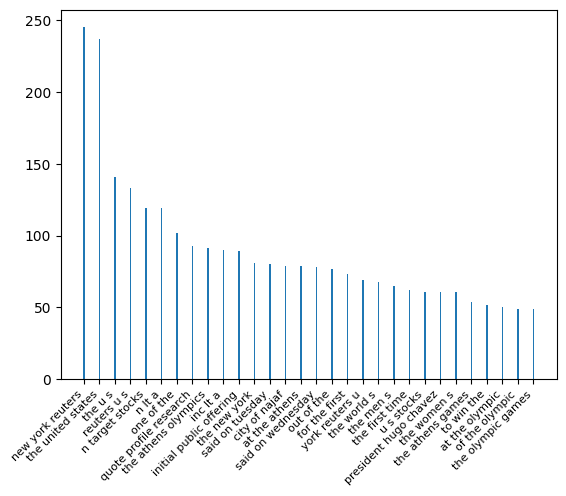

In [24]:
storage_values = list(storage.values())
storage_sorted = sorted(storage_values, key=lambda x: x[0], reverse=True)
storage_sorted = list(filter(lambda x: x[0] != 183, storage_sorted))

fig, ax = plt.subplots()

fruits = ['apple', 'blueberry', 'cherry', 'orange']
counts, trigrams_list = zip(*storage_sorted[:30])
trigrams_str = [' '.join(trg) for trg in trigrams_list]
print(counts)
print(trigrams_str)
ax.bar(trigrams_str, counts, width=0.1)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.show()